import numpy as np
import matplotlib.pyplot as plt
from tempfile import TemporaryFile

para1 = 1
para2 = 100
para3 = 250

arr = [1,2,5,7,11]

print(arr)

#speichern von arrays
np.save('korb', arr)

#speichern von Parametern (mit 'namen')
np.savez('parakorb', p1=para1, p3=para3)   #macht dictionary draus!

#TODO: Pfade einbauen

#laden
korbarray = np.load('korb'+'.npy')
parasammlung = np.load('parakorb'+'.npz')

#Ausgabe Namensliste
print(parasammlung.files)

#Ausgabe arrays
print(korbarray)
#Ausgabe spezifischer Paras
print(parasammlung['p1'])
print(parasammlung['p3'])

#VORSICHT
parameter1, parameter2 = parasammlung
print(parameter1)
print(parameter2)

print(parasammlung[parameter1])

In [10]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib


# Paraliste:
timesteps = 1
dim = 2
dens = 1
rc = 2
birthrate = 0.5
deathrate = 0.02

# Ausgabe aller Indizes
ausgabe = False
saving = False
id = 711
saving_data = False
saving_entropies = False
saving_plots = False


In [11]:
# Durchlauf
lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim, r_b = birthrate, variation = False, restchannels = rc ,r_d = deathrate)
lgca.timeevo(timesteps, record=True)



standard deviation set to =  0.1
Progress: [####################] 100% Done...


DATEN SPEICHERN:

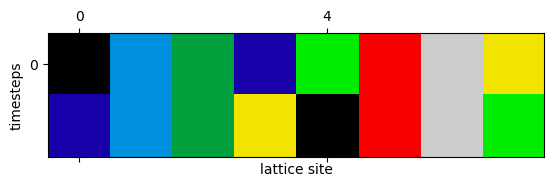

In [12]:
if saving_data:
    np.save('saved_data/' + 'props_t id=' + str(id), lgca.props_t)
    np.savez('saved_data/' + 'Parameter id=' + str(id), density = lgca.density, restchannels = lgca.restchannels,\
             velocitychannels=lgca.l, kappa=lgca.K, rb=lgca.r_b, rd=lgca.r_d, m=lgca.r_int)
if saving_entropies:
    np.savez('saved_data/' + 'Entropies id=' + str(id), \
             shan=entropies(lgca.props_t,1), simpson=entropies(lgca.props_t,1.5), gini=entropies(lgca.props_t,2))

lgca.spatial_plot()

LADEN DER DATEN:

In [16]:
print(lgca.nodes_t)
print(lgca.props_t)
print(lgca.nodes)
# parasammlung = np.load('saved_data/' + 'Parameter id=0'+'.npz')

# print(parasammlung.files)
# print(parasammlung['density'])
# print(parasammlung['restchannels'])
# print(parasammlung['velocitychannels'])
# print(parasammlung['kappa'])
# print(parasammlung['m'])

# propst = np.load('saved_data/' + 'props_t id=0' +'.npy')
# print(propst)

# entropies = np.load('saved_data/' + 'Entropies id=0'+'.npz')
# sh, si, gi = entropies
# print(entropies[sh], entropies[si], entropies[gi])

[[[1 2 3 4]
  [5 6 7 8]]

 [[2 6 3 4]
  [1 5 7 8]]]
[{'r_b': [0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'lab_m': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'num_off': [-99, 1, 1, 1, 1, 1, 1, 1, 1]}, {'r_b': [0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'lab_m': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'num_off': [-99, 1, 1, 1, 1, 1, 1, 1, 1]}]
[[0 0 0 0]
 [2 6 3 4]
 [1 5 7 8]
 [0 0 0 0]]


<IPython.core.display.Javascript object>


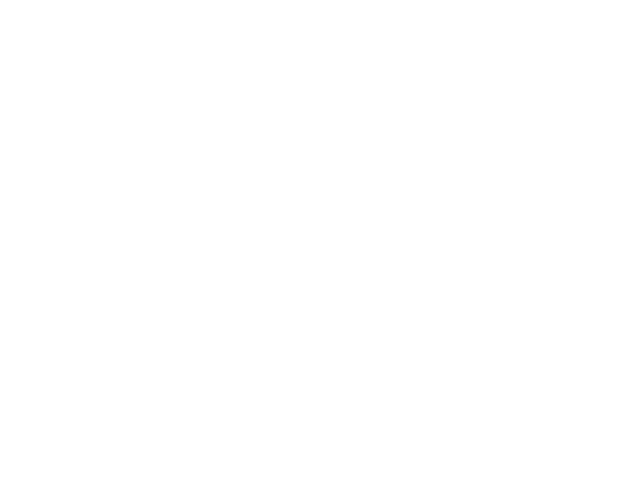

<IPython.core.display.Javascript object>


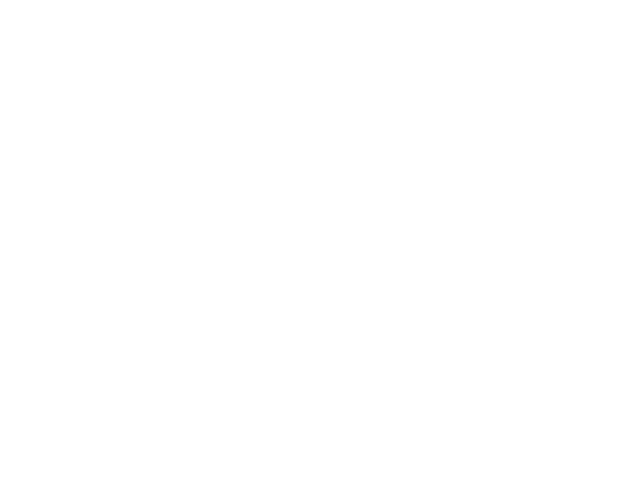

In [ ]:
%matplotlib notebook
plot_entropies_together(lgca.props_t, id=id, save=saving_plots)
plot_hill_together(lgca.props_t, id=id, save=saving_plots)

In [ ]:
%matplotlib notebook
lgca.bar_stacked_relative(save = saving, id = id)

<IPython.core.display.Javascript object>

In [ ]:
plot_popsize(lgca.props_t, save=saving, id=id)